<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


In [1]:
!nvidia-smi

Tue Aug  1 18:10:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.12.0


In [3]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [4]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [5]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done


## Task 3: Download and Import the Quora Insincere Questions Dataset

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.12.0
Eager mode:  True
Hub version:  0.14.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [8]:
!pip install numpy

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip', compression='zip', low_memory=False)

In [10]:
df.tail(50)

,qid,question_text,target
1306072,fffdb6910e5d749fa784,Should Russia continue to trust Vietnam and In...,0
1306073,fffdd28ccce6f5f1298e,Are there any engineering colleges in Mumbai t...,0
1306074,fffdd4a5cd122e202520,What do you think will happen in the future if...,0
1306075,fffddaeb6a830aeb28cc,What shall I know if I start weightlifting at ...,0
1306076,fffde725aa2a4dfe997f,Is it still called depression if I am comforta...,0
1306077,fffde7984c2b2e0d15af,How did Kohl's become so successful in Bloomin...,0
1306078,fffde9804ace4cfe50e2,How can I write a good horror book?,0
1306079,fffe09d50a0be3f28c76,What should I prepare if I want to take the po...,0
1306080,fffe11975612eb9adf8e,How are Amway products beneficial claims regul...,0
1306081,fffe1496d76ea9b3f3c1,Does bravery only exist when you feel fearful ...,0


In [11]:
df.target.value_counts()

target
0    1225312
1      80810
Name: count, dtype: int64

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.shape

(1306122, 3)

In [14]:
train_df, valid_df = train_test_split(df, random_state=42, train_size=0.01, test_size=0.001, stratify=df.target.values)
train_df.shape, valid_df.shape

((13061, 3), (1307, 3))

In [15]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))

In [16]:
for t, l in train_data.take(1):
  print(l)
  print(t)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'What is your experience living in Venezuela in the current crisis? (2018)', shape=(), dtype=string)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [17]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
 # maximum length of (token) input sequences
labels = [0, 1]
max_seq_length = 128
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True)
vocab = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

tokenizer = tokenization.FullTokenizer(vocab, do_lower_case)

In [18]:
sample_tokens = tokenizer.wordpiece_tokenizer.tokenize('hi, this is Ali from Iran! nice to meet you!' )
sample_tokens

['hi',
 '##,',
 'this',
 'is',
 '[UNK]',
 'from',
 '[UNK]',
 'nice',
 'to',
 'meet',
 'you',
 '##!']

In [19]:
sample_token_ids = tokenizer.convert_tokens_to_ids(sample_tokens)
sample_token_ids

[7632, 29623, 2023, 2003, 100, 2013, 100, 3835, 2000, 3113, 2017, 29612]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [20]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=labels, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(
      guid=None,
      text_a = text.numpy(),
      text_b = None,
      label = label.numpy()
  )
  feature = classifier_data_lib.convert_single_example(0, example, labels, max_seq_length, tokenizer)
  return feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id

In [21]:
for s, l in train_data.take(1):
  input_ids, input_mask, segment_ids, label_id = to_feature(s, l)
  print(input_ids)
  print(input_mask)
  print(segment_ids)
  print(label_id)


[101, 2054, 2003, 2115, 3325, 2542, 1999, 8326, 1999, 1996, 2783, 5325, 1029, 1006, 2760, 1007, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [22]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
      'input_mask': input_mask,
      'input_type_ids': segment_ids,
  }

  return (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [23]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
  .shuffle(1000) \
  .batch(train_batch_size, drop_remainder=True) \
  .prefetch(tf.data.experimental.AUTOTUNE))


  # valid
  valid_data = (valid_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
  .batch(train_batch_size, drop_remainder=True) \
  .prefetch(tf.data.experimental.AUTOTUNE))



The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [24]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [25]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [26]:
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
# preprocessor = hub.KerasLayer(
#     "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# encoder_inputs = preprocessor(text_input)
# encoder = hub.KerasLayer(
#     "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
#     trainable=True)
# outputs = encoder(encoder_inputs)
# pooled_output = outputs["pooled_output"]      # [batch_size, 768].
# sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].


In [36]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length, ), dtype=tf.int32, name='input_word_ids')
  input_mask = tf.keras.layers.Input(shape=(max_seq_length, ), dtype=tf.int32, name='input_mask')
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length, ), dtype=tf.int32, name='input_type_ids')

  pooled_output, _ = bert_layer([input_word_ids, input_mask, input_type_ids])

  dropout1 = tf.keras.layers.Dropout(0.5, name='dropout1')(pooled_output)
  dense1 = tf.keras.layers.Dense(128, activation='relu', name='dense1')(dropout1)

  dropout2 = tf.keras.layers.Dropout(0.3, name='dropout2')(dense1)
  output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(dropout2)

  model = tf.keras.Model(
      inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids
      },
      outputs=output
  )

  return model

## Task 10: Fine-Tune BERT for Text Classification

In [37]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',       

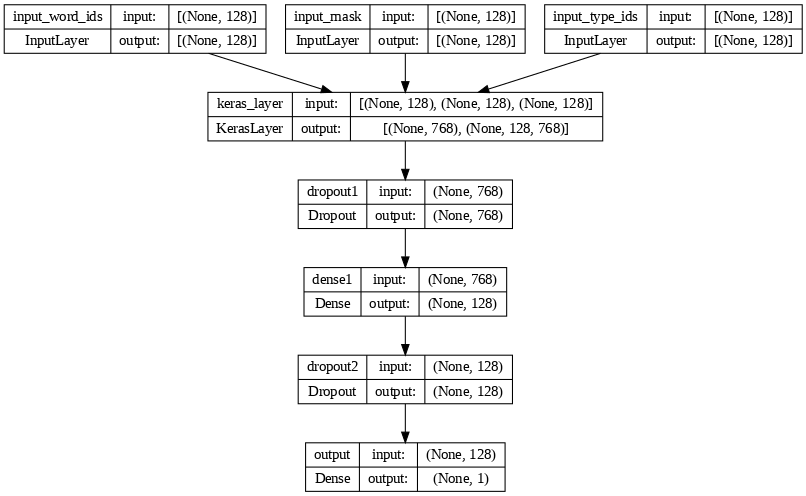

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=76)

In [39]:
# Train model
history = model.fit(train_data, validation_data=valid_data, epochs=3, verbose=1)

Epoch 1/3
408/408 [==============================] - 393s 866ms/step - loss: 0.1231 - binary_accuracy: 0.9513 - val_loss: 0.1046 - val_binary_accuracy: 0.9570
Epoch 2/3
408/408 [==============================] - 345s 844ms/step - loss: 0.0729 - binary_accuracy: 0.9737 - val_loss: 0.1245 - val_binary_accuracy: 0.9508
Epoch 3/3
408/408 [==============================] - 354s 864ms/step - loss: 0.0370 - binary_accuracy: 0.9881 - val_loss: 0.2061 - val_binary_accuracy: 0.9438


## Task 11: Evaluate the BERT Text Classification Model

In [41]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [42]:
print(history.history)

{'loss': [0.12314359843730927, 0.07290508598089218, 0.03695635125041008], 'binary_accuracy': [0.951286792755127, 0.9736519455909729, 0.9880514740943909], 'val_loss': [0.10464997589588165, 0.12454511970281601, 0.20610518753528595], 'val_binary_accuracy': [0.95703125, 0.9507812261581421, 0.9437500238418579]}


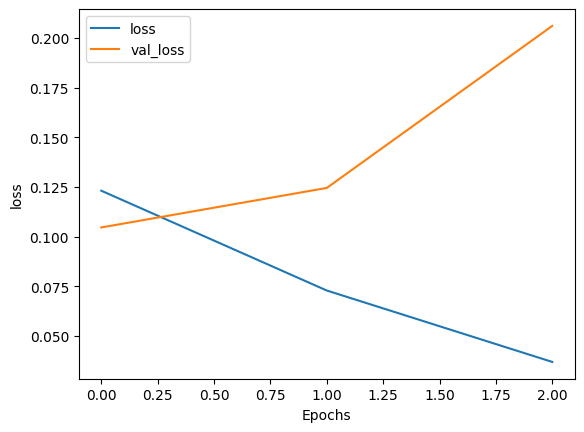

In [43]:
plot_graphs(history, 'loss')

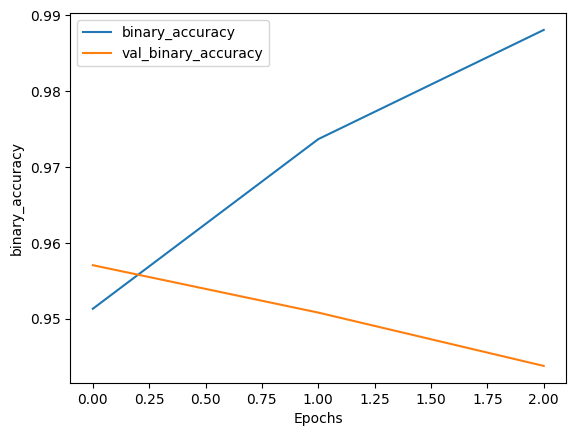

In [44]:
plot_graphs(history, 'binary_accuracy')

In [49]:
sample_example = ['...', 'hello dear friend']

test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

['Insincere' if pred>= 0.5 else 'Sincenre' for pred in preds]

2/2 [==============================] - 0s 22ms/step


['Sincenre', 'Sincenre']